# Numerical Calculus
## Differentiation
### Difference formulae

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Callable

(-1.0, 1.0)

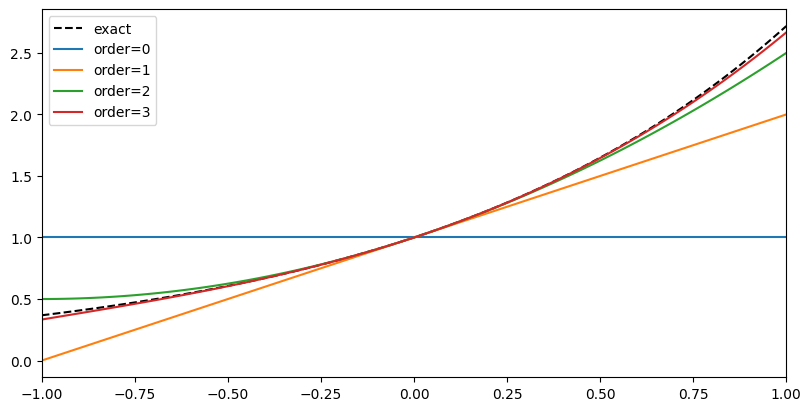

In [3]:
from math import factorial


def taylor_exponential(x0, h, order):
    return np.exp(x0) * np.array([
        h ** n / factorial(n)
        for n in range(0,order+1)
    ]).sum(axis=0)


fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8,4))

x = np.linspace(-1, 1, 100)
h = np.logspace(-6,0,100)
y = np.exp(x)
ax.plot(x, y, 'k--', label="exact")

for order in range(4):
    ax.plot(x, taylor_exponential(x0=0, h=x, order=order), label=f"order={order}")
ax.legend()
ax.set_xlim(-1, 1)

In [6]:
def polynomial(x: float) -> float:
    return x - x ** 2 + x ** 3 - x ** 4

def polynomial_derivative(x: float) -> float:
    return 1 - 2 * x + 3 * x ** 2 - 4 * x ** 3

def tangent_factory(x0: float, f: Callable[[float], float], df: Callable[[float], float]) -> Callable[[float], float]:
    y0 = f(x0)
    m = df(x0)
    c = y0 - m * x0
    
    def tangent(x: float) -> float:
        return m * x + c
    
    return tangent

In [7]:
def first_forward_difference(f: Callable[[float], float], x: float, h: float) -> float:
    """
    first forward differences of f at point x with step size h
    """
    return (f(x + h) - f(x)) / h
    

def first_backward_difference(f: Callable[[float], float], x: float, h: float) -> float:
    """
    first backward differences of f at point x with step size h
    """
    return (f(x) - f(x - h)) / h
    

def first_central_difference(f: Callable[[float], float], x: float, h: float) -> float:
    """
    first central differences of f at point x with step size h
    """
    return (f(x + h) - f(x - h)) / (2 * h)


def five_point_formula(f: Callable[[float], float], x: float, h: float) -> float:
    """
    five-point formula applied to f at point x with step size h
    """
    return (f(x - 2 * h) - f(x + 2 * h) - 8 * f(x - h) + 8 * f(x + h) ) / (12 * h)


def another_five_point_formula(f: Callable[[float], float], x: float, h: float) -> float:
    """
    five-point formula with steps +/-3h, +-h
    """
    return (f(x - 3 * h) - f(x + 3 * h) - 27 * f(x - h) + 27 * f(x + h)) / (48 * h)


def first_complex_difference(f: Callable[[complex], complex], x: float, h: float) -> float:
    """
    first complex differences of Callable[[float], float] f at point x with step size h*1j
    """
    return (f(x+1j*h)/h).imag

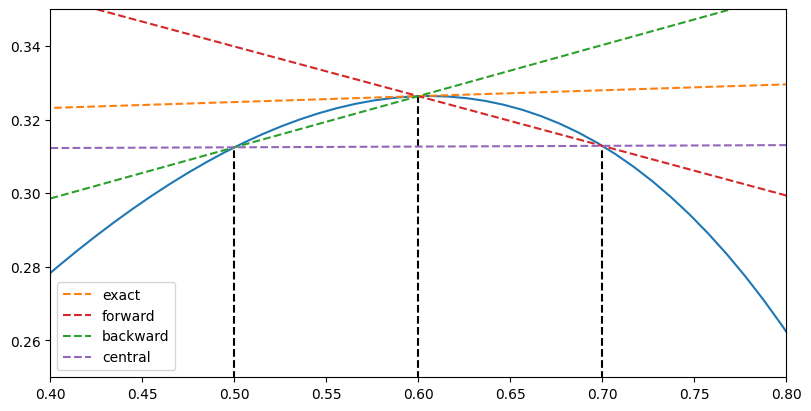

In [8]:
x = np.linspace(0, 1, 100)
f = polynomial
df = polynomial_derivative

x0 = 0.6
tangent = tangent_factory(x0, f, df)

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8,4))
ax.plot(x, f(x))
ax.plot(x, tangent(x), '--', label="exact")
ax.set_xlim(0.4,0.8)
ax.set_ylim(0.25,0.35)


h = 0.1

ax.plot((x0 - h, x0 - h), (0, f(x0 - h)), color='k', linestyle='--')
ax.plot((x0, x0), (0, f(x0)), color='k', linestyle='--')
ax.plot((x0 + h, x0 + h), (0, f(x0 + h)), color='k', linestyle='--')

ax.axline((x0, f(x0)), slope=first_forward_difference(f, x0, h), linestyle='--', color='tab:red', label="forward")
ax.axline((x0, f(x0)), slope=first_backward_difference(f, x0, h), linestyle='--', color='tab:green', label="backward")
ax.axline((x0-h, f(x0-h)), slope=first_central_difference(f, x0, h), linestyle='--', color='tab:purple', label="central")
# ax.axline((x0, f(x0)), slope=first_complex_difference(f, x0, h), linestyle='--', color='tab:cyan', label="complex")

ax.legend()

### Errors

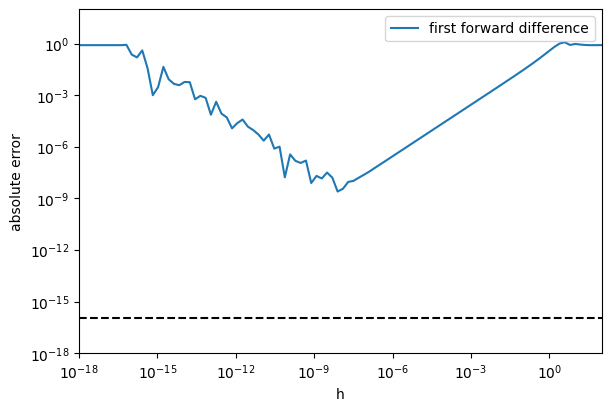

In [9]:
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(6,4))

f = np.sin
df = np.cos
x0 = 0.6
df0 = df(x0)

h = np.logspace(-18,2,100)

difference_functions = (
    first_forward_difference, 
    # first_central_difference, 
    # five_point_formula,
    # another_five_point_formula,
    # first_complex_difference,
)

for difference_function in difference_functions:
    df_approx = difference_function(f, x0, h)
    label = difference_function.__name__.replace("_", " ")
    ax.plot(h, abs(df_approx-df0), label=label)

# ax.plot(h, abs((x0 + h - x0 - h) / h), label="error in h")

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("h")
ax.set_ylabel("absolute error")
ax.set_xlim(h.min(), h.max())
ax.set_ylim(h.min(), h.max())
ax.legend()

ax.axhline(np.finfo(np.float64).epsneg, color='k', linestyle='--', label="epsneg")


## Integration

In [10]:
from functools import partial
from typing import Callable

import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt

In [20]:
def rectangle(f: Callable[[float], float], a: float | ndarray, b: float | ndarray) -> float | ndarray:
    """
    evaluate the rectangle rule approximation to the integral of f on the interval [a, b]

    >>> rectangle(f = lambda y: 4, a=1.0, b=3.0)
    8.0
    """
    h = b - a
    return h * f(a)


def trapezium(f: Callable[[float], float], a: float | ndarray, b: float | ndarray) -> float | ndarray:
    """
    evaluate the trapezium rule approximation to the integral of f on the interval [a, b]

    >>> trapezium(f = lambda y: 4*y+4, a=1.0, b=3.0)
    24.0
    """
    return (f(b)+f(a))/2*(b-a)


def simpson(f: Callable[[float], float], a: float | ndarray, b: float | ndarray) -> float | ndarray:
    """
    evaluate the Simpson rule approximation to the integral of f on the interval [a, b]

    >>> simpson(f=lambda y: 3*y**2+4*y+4, a=1.0, b=3.0)
    50.0
    """
    return (b-a)/6*(f(a)+4*f((a+b)/2)+f(b))


METHODS = {
    'rectangle': rectangle,
    'trapezium': trapezium,
    'simpson': simpson,
}


In [12]:
def integrate(f: Callable[[float], float], a: float, b: float, intervals: int, method: str = 'simpson') -> float:
    """
    compute the integral of f on the major interval [a,b] by numerically integrating over a number of minor intervals
    using the specified method.

    Methods available are:
        Newton--Cotes:
            rectangle: rectangle rule
            trapezium: trapezium rule
            simpson: Simpson's rule
        Gauss--Legendre:
            gauss1: Gauss--Legendre quadrature on one node
            gauss2: Gauss--Legendre quadrature on two nodes
            gauss3: Gauss--Legendre quadrature on three nodes

    >>> integrate(f = lambda y: 4, a=1.0, b=3.0, intervals=10, method='rectangle')
    8.0
    >>> integrate(f = lambda y: 4*y+4, a=1.0, b=3.0, intervals=10, method='trapezium')
    24.0
    >>> integrate(f=lambda y: 3*y**2+4*y+4, a=1.0, b=3.0, intervals=10, method='simpson')
    50.0
    """
    xs = np.linspace(a, b, intervals + 1)
    avals, bvals = xs[:-1], xs[1:]

    return METHODS[method](f, avals, bvals).sum()

In [13]:
integrate(f = lambda y: 4, a=1.0, b=3.0, intervals=10, method='rectangle')

8.0

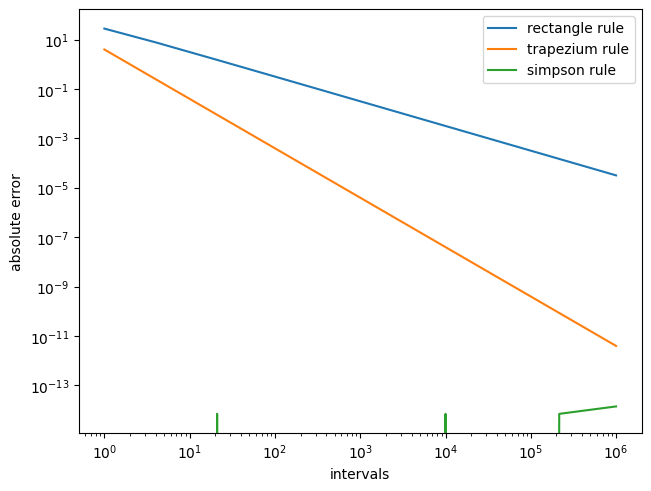

In [21]:
fig, ax = plt.subplots(1, 1, constrained_layout=True)

intervals = np.logspace(0, 6, 10).astype(int)


methods = (
    "rectangle",
    "trapezium",
    "simpson",
)

for method in methods:
    integrals = np.array([
        integrate(f = lambda y: 3*y**2+4*y+4, a=1.0, b=3.0, intervals=n, method=method)
        for n in intervals
    ])
    errors = abs(50.0 - integrals)
    ax.plot(intervals, errors, label=f'{method} rule')

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("intervals")
ax.set_ylabel("absolute error")
ax.legend()

In [42]:
def gauss1(f: Callable[[float], float], a: float | ndarray,
           b: float | ndarray) -> float | ndarray:
    """
    approximate the integral of f on the interval [a, b] using 1-node Gauss-Legendre quadrature

    >>> gauss1(f = lambda y: 4*y+4, a=1.0, b=3.0)
    24.0
    """
    tau = (a + b) / 2
    h = (b - a) / 2
    return f(tau) * h * 2


def gauss2(f: Callable[[float], float], a: float | ndarray,
           b: float | ndarray) -> float | ndarray:
    """
    approximate the integral of f on the interval [a, b] using 2-node Gauss-Legendre quadrature

    >>> gauss2(f=lambda y: 4*y**3+3*y**2+4*y+4, a=1.0, b=3.0)
    130.0
    """
    raise NotImplementedError

def gauss3(f: Callable[[float], float], a: float | ndarray,
           b: float | ndarray) -> float | ndarray:
       return 